In [1]:
import pandas as pd

In [2]:
import geopandas as gpd

In [3]:
# чтение файлов

In [4]:
df = pd.read_pickle('../rfsd_data_with_workers_and_historical_data_and_predicted_workers_count.pck')

In [17]:
outer_borders = gpd.read_file('./outer_borders.shp')

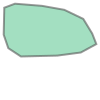

In [18]:
bord = outer_borders.geometry[0]
bord

In [19]:
geodf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.lon, df.lat), crs="EPSG:4326"
)

In [20]:
geocity = geodf[geodf.within(bord) & (geodf.dissolution_date.isnull())]

In [21]:
len(geocity)

76009

In [10]:
geocity.combined_workers_count.sum()

np.float64(1003370.1316745343)

In [11]:
# донасыщение данными dadata

In [25]:
to_get_from_dadata = geocity[geocity['geocoding_quality'] != 'house']

<Axes: >

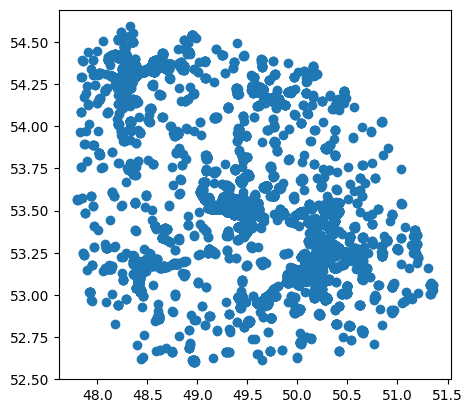

In [26]:
to_get_from_dadata.plot()

In [27]:
to_get_from_dadata

inn  year     region region_taxcode   age dissolution_date  \
326872   7313008473  2014  ulyanovsk             73   0.0              NaT   
350297   6377015354  2014     samara             63   3.0              NaT   
350558   6362012174  2014     samara             63   9.0              NaT   
351438   6324015865  2014     samara             63   3.0              NaT   
351726   6322018892  2014     samara             63  27.0              NaT   
...             ...   ...        ...            ...   ...              ...   
5020842  1327007101  2023  ulyanovsk             13  15.0              NaT   
5022472  1326208165  2023  ulyanovsk             13  15.0              NaT   
5023792  1322120495  2023  ulyanovsk             13  19.0              NaT   
5023875  1322001145  2023     samara             13   7.0              NaT   
5037406  1102063509  2023     samara             11  14.0              NaT   

         filed     okved okved_section  okopf  ...  line_2120 line_2200  \
326872     1.0     66.21             K  12300  ...        NaN       NaN   
350297     1.0     85.13             P  20903  ...        NaN       NaN   
350558     1.0  84.11.35             O  20904  ...        NaN       NaN   
351438     1.0  45.31.10             G  12300  ...    28912.0    3846.0   
351726     1.0  52.21.24             H  20101  ...        NaN       NaN   
...        ...       ...           ...    ...  ...        ...       ...   
5020842    1.0  46.33.20             G  12300  ...  4942676.0   24739.0   
5022472    1.0     47.30             G  12300  ...        NaN       NaN   
5023792    1.0     47.11             G  12300  ...  1762930.0   21768.0   
5023875    1.0     46.73             G  12300  ...      945.0      42.0   
5037406    1.0     71.12             M  12300  ...    20534.0  -12767.0   

        line_2300 line_2350 line_2400  line_2500  workers_count  \
326872        NaN       NaN       NaN        NaN            NaN   
350297        NaN       NaN       NaN        NaN            NaN   
350558        NaN       NaN       NaN        NaN            NaN   
351438       76.0    2745.0      61.0       61.0            NaN   
351726        NaN       NaN       NaN        NaN            NaN   
...           ...       ...       ...        ...            ...   
5020842     724.0   26172.0    1846.0     -398.0           43.0   
5022472       NaN       NaN       0.0        0.0            1.0   
5023792   -8281.0   35625.0   -7402.0    -9160.0          409.0   
5023875      42.0       NaN      42.0       42.0            0.0   
5037406  -12369.0    1073.0  -12369.0   -12369.0            5.0   

         predicted_workers_count  combined_workers_count  \
326872                 15.185096               15.185096   
350297                  9.186125                9.186125   
350558                 28.903126               28.903126   
351438                  7.568392                7.568392   
351726                  8.297604                8.297604   
...                          ...                     ...   
5020842                      NaN               43.000000   
5022472                      NaN                1.000000   
5023792                      NaN              409.000000   
5023875                      NaN                0.000000   
5037406                      NaN                5.000000   

                          geometry  
326872   POINT (48.12257 53.17304)  
350297   POINT (51.12928 52.98516)  
350558   POINT (49.00948 53.07581)  
351438   POINT (49.46253 53.51088)  
351726   POINT (49.46315 53.50995)  
...                            ...  
5020842    POINT (48.3305 54.2636)  
5022472   POINT (47.92049 53.0191)  
5023792    POINT (48.3305 54.2636)  
5023875  POINT (49.42275 53.51298)  
5037406  POINT (50.20393 53.21946)  

[53875 rows x 30 columns]

In [48]:
tokens = [{'email': 'gvaisberg@yandex.ru', 'token': '8f133def210da41a5800035baa5e82158ab3962e'},
          {'email': 'gri.sha.vaisberg@gmail.com', 'token': '88b0b8b6c56f4faf9e6286ca6f06ed7d776a24fc'},
          {'email': 'grisha.vaisberg@gmail.com', 'token': '5f095d9245dbe617d8b40c7588b825ab7f94a533'},
          {'email': 'rita1', 'token': 'f78446d26a280577636e755f0010afa0c6f92b25'},
          {'email': 'rita2', 'token': 'b6b1af99fb76f9305964f86db273d218f344319f'},
          {'email': 'gavaysberg@edu.hse.ru', 'token': 'b91d3ab90d4b35f3ccbaec60a751976e84f93a52'},
          {'email': 'grisha.vaisberg+2@gmail.com', 'token': '737312b14520c2126734c975f3ad488ccd66f0f2'},
          {'email': 'grisha.vaisberg+4@gmail.com', 'token': 'e878fdac664f71bd3cd7f9c242f62e8c92a04180'},
          {'email': 'grisha.vaisberg+90@gmail.com', 'token': '0a2ebb5f250374a601ee3283bfc9668a8b9e9631'},
          {'email': 'gregory@dton.io', 'token': 'af8375a53d5f3b93d7c3092437031687d08a2655'},
          {'email': 'hi@dton.io', 'token': 'a5a5e1fb68092fc17f391174c3da7033340791cd'},
          {'email': 'nikita', 'token': '1e101df89e116da942a996457f8f23e4de525acf'}
         ]

In [29]:
from dadata import Dadata

In [30]:
not_found = list(to_get_from_dadata.inn)

In [34]:
# not_found_info_dadata = dict()
# totaly_not_found = list()

In [32]:
from tqdm.notebook import tqdm

In [33]:
len(not_found_info_dadata)

0

In [49]:
token = tokens[8]['token']
dadata = Dadata(token)
for i in tqdm(not_found):
    inn = i
    if inn not in not_found_info_dadata:
        data = dadata.find_by_id("party", inn)
        if len(data):
            result = data[0]
            not_found_info_dadata[inn] = result
        else:
            totaly_not_found.append(inn)

  0%|          | 0/53875 [00:00<?, ?it/s]

In [50]:
len(not_found_info_dadata), len(totaly_not_found)

(53875, 0)

In [51]:
to_pd = []
for inn in not_found_info_dadata:
    i = not_found_info_dadata[inn]
    to_pd.append([i['value'], 
                  inn, 
                  not_found_info_dadata[inn]['data']['address']['data']['geo_lon'], 
                  not_found_info_dadata[inn]['data']['address']['data']['geo_lat']])

In [52]:
gdf = gpd.GeoDataFrame(to_pd, columns=['name', 'inn', 'lon', 'lat'])
gdf = gpd.GeoDataFrame(
    gdf, geometry=gpd.points_from_xy(gdf.lon, gdf.lat), crs="EPSG:4326"
)

In [53]:
# gdf.to_file('samara_info_dadata_geojson.geojson')

In [55]:
geodadata = gpd.gpd.read_file('samara_info_dadata_geojson.geojson')
geodadata = geodadata[geodadata.within(bord)]

In [56]:
geodadata['dadata_lon'] = geodadata['lon']
geodadata['dadata_lat'] = geodadata['lat']

In [57]:
geocity = geocity.merge(geodadata[['inn', 'dadata_lon', 'dadata_lat']], on='inn', how='left')


In [121]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [125]:
geocity['dadata_lat'] = geocity['dadata_lat'].fillna(geocity['lat'])
geocity['dadata_lon'] = geocity['dadata_lon'].fillna(geocity['lon'])

In [127]:
geocity = gpd.GeoDataFrame(
    geocity, geometry=gpd.points_from_xy(geocity.dadata_lon, geocity.dadata_lat), crs="EPSG:4326"
)

In [128]:
geocity_simplified = geocity[['inn', 'dadata_lon', 'dadata_lat', 'workers_count', 'predicted_workers_count', 'combined_workers_count', 'line_2110', 'geometry']]


In [130]:
type(geocity_simplified)

geopandas.geodataframe.GeoDataFrame

In [131]:
geocity_simplified.to_csv('samara_workers_count_dadata_coords_predicted.csv')

In [133]:
#no qgis

In [134]:
# загрузка районов

In [25]:
distr = gpd.read_file('districts_with_work_places1.shp')

In [26]:
distr

field_1       NO                                              coord  \
0          0  10101.0  MULTIPOLYGON (((5517610.142037619 7201393.0891...   
1          1  10102.0  MULTIPOLYGON (((5517671.281001735 7201672.5815...   
2          2  10103.0  MULTIPOLYGON (((5511681.737379976 7204404.7871...   
3          3  10104.0  MULTIPOLYGON (((5505415.790541368 7203039.4330...   
4          4  10105.0  MULTIPOLYGON (((5525328.744797265 7206741.1374...   
..       ...      ...                                                ...   
393      409  99914.0  MULTIPOLYGON (((5555695.429804823 6916070.5500...   
394      410  99915.0  MULTIPOLYGON (((5503591.180004612 6908743.2612...   
395      411  99916.0  MULTIPOLYGON (((5360182.345977119 6942151.4816...   
396      412  99917.0  MULTIPOLYGON (((5320649.833737513 7002139.7641...   
397      413  99918.0  MULTIPOLYGON (((5322348.166418481 7146439.1867...   

    work_place                                           geometry  
0         None  POLYGON ((49.62106 54.20701, 49.62133 54.20774...  
1         None  POLYGON ((49.62161 54.20848, 49.62118 54.20733...  
2         None  POLYGON ((49.56774 54.22285, 49.56774 54.22285...  
3         None  POLYGON ((49.51139 54.21567, 49.51183 54.21714...  
4         None  MULTIPOLYGON (((49.69048 54.23513, 49.68916 54...  
..         ...                                                ...  
393       None  POLYGON ((49.96357 52.67888, 49.959 52.68144, ...  
394       None  POLYGON ((49.49498 52.63891, 49.49042 52.64147...  
395       None  POLYGON ((48.20528 52.82085, 48.20071 52.82341...  
396       None  POLYGON ((47.84975 53.14564, 47.84519 53.14821...  
397       None  POLYGON ((47.86503 53.91696, 47.86046 53.91952...  

[398 rows x 5 columns]

In [20]:
distr['work_places'] = distr['ÐÐ¢_ÐÐ¡Ð']
del distr['ÐÐ¢_ÐÐ¡Ð']

In [154]:
distr.crs = 'EPSG:4326'

In [155]:
districts_df = distr.set_index('NO')

In [156]:
districts_df = districts_df.to_crs("EPSG:3857")

In [157]:
districts_df['simetra_workers_count'] = districts_df['ÐÐ¢_ÐÐ¡Ð']

In [158]:
companies_df = geocity_simplified.to_crs('EPSG:3857')

In [159]:
import contextily as cx


In [160]:
## визуализация

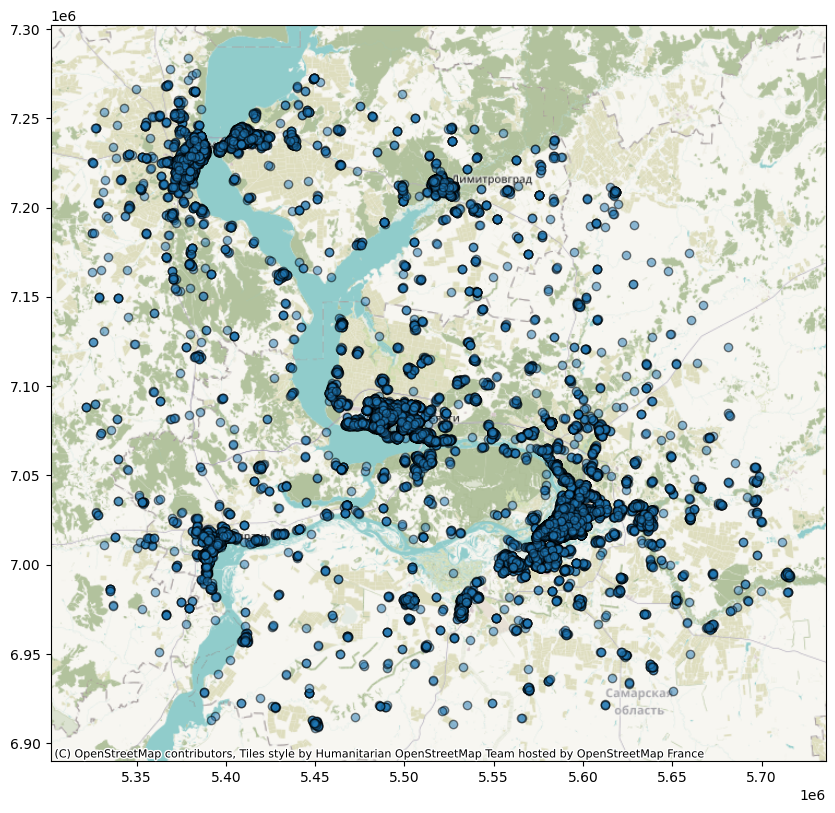

In [161]:
ax = companies_df.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")
cx.add_basemap(ax)

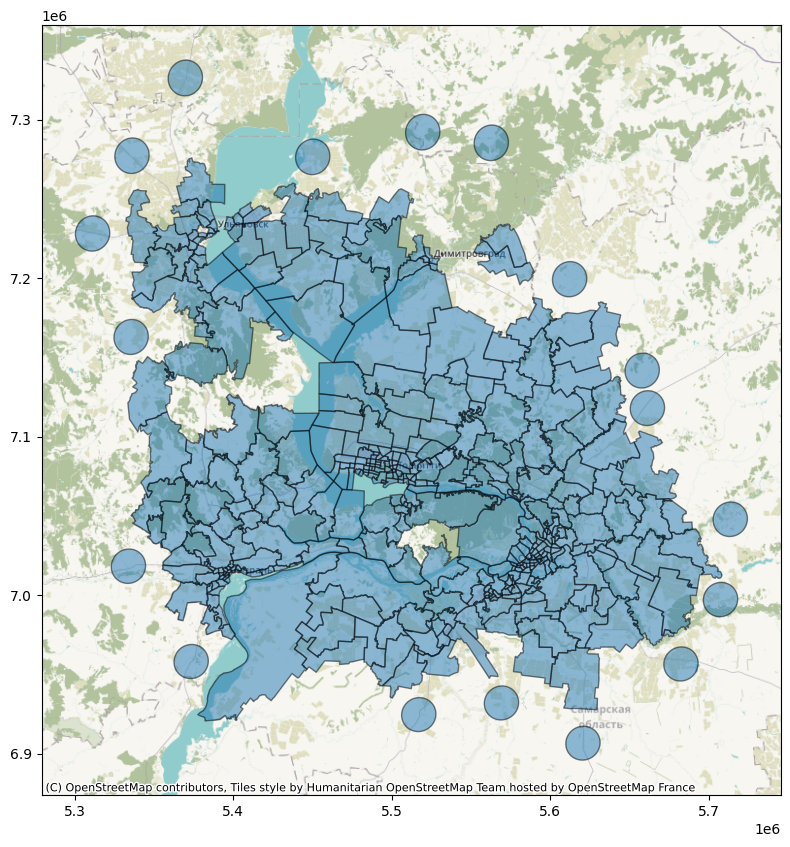

In [162]:
ax = districts_df.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")
cx.add_basemap(ax)

In [163]:
## aggregation

In [164]:
districts_df

field_1              ÐÐ±Ð»Ð°Ñ  \
NO                                         
10101.0        0  Ð£Ð»ÑÑÐ½Ð¾Ð²ÑÐºÐ°Ñ   
10102.0        1  Ð£Ð»ÑÑÐ½Ð¾Ð²ÑÐºÐ°Ñ   
10103.0        2  Ð£Ð»ÑÑÐ½Ð¾Ð²ÑÐºÐ°Ñ   
10104.0        3  Ð£Ð»ÑÑÐ½Ð¾Ð²ÑÐºÐ°Ñ   
10105.0        4  Ð£Ð»ÑÑÐ½Ð¾Ð²ÑÐºÐ°Ñ   
...          ...                     ...   
99914.0      409            ÐÐ¾ÑÐ´Ð¾Ð½   
99915.0      410            ÐÐ¾ÑÐ´Ð¾Ð½   
99916.0      411            ÐÐ¾ÑÐ´Ð¾Ð½   
99917.0      412            ÐÐ¾ÑÐ´Ð¾Ð½   
99918.0      413            ÐÐ¾ÑÐ´Ð¾Ð½   

                                                      NAME  MAINZONE~1  \
NO                                                                       
10101.0  Ð³Ð¾ÑÐ¾Ð´ÑÐºÐ¾Ð¹ Ð¾ÐºÑÑÐ³ ÐÐ¸Ð¼Ð¸ÑÑÐ¾Ð²...       101.0   
10102.0  Ð³Ð¾ÑÐ¾Ð´ÑÐºÐ¾Ð¹ Ð¾ÐºÑÑÐ³ ÐÐ¸Ð¼Ð¸ÑÑÐ¾Ð²...       101.0   
10103.0  Ð³Ð¾ÑÐ¾Ð´ÑÐºÐ¾Ð¹ Ð¾ÐºÑÑÐ³ ÐÐ¸Ð¼Ð¸ÑÑÐ¾Ð²...       101.0   
10104.0  Ð³Ð¾ÑÐ¾Ð´ÑÐºÐ¾Ð¹ Ð¾ÐºÑÑÐ³ ÐÐ¸Ð¼Ð¸ÑÑÐ¾Ð²...       101.0   
10105.0  Ð³Ð¾ÑÐ¾Ð´ÑÐºÐ¾Ð¹ Ð¾ÐºÑÑÐ³ ÐÐ¸Ð¼Ð¸ÑÑÐ¾Ð²...       101.0   
...                                                    ...         ...   
99914.0                                           36Ð-349         NaN   
99915.0                                             Ð -229         NaN   
99916.0                                             Ð -228         NaN   
99917.0                                  Ð-5 (ÐÐ°Ð¿Ð°Ð´)         NaN   
99918.0                                          73Ð-1427         NaN   

         AREAKM2  ÐÐ¢_ÐÐ¡Ð  ÐÐ¢_Ð£Ð¡Ð     A     B       C     D      E  \
NO                                                                          
10101.0      6.0      1285.0      1104.0   0.0   0.0    81.0   0.0   10.0   
10102.0      5.0      8726.0      7402.0   0.0  30.0   716.0  10.0  318.0   
10103.0     32.0     14254.0     13381.0   0.0   0.0    95.0   0.0  568.0   
10104.0     46.0      9908.0      5883.0   0.0   0.0  2970.0  10.0  890.0   
10105.0     14.0     13673.0     11950.0  45.0   0.0  1249.0  20.0  289.0   
...          ...         ...         ...   ...   ...     ...   ...    ...   
99914.0    134.0         0.0         0.0   0.0   0.0     0.0   0.0    0.0   
99915.0    134.0         0.0         0.0   0.0   0.0     0.0   0.0    0.0   
99916.0    133.0         0.0         0.0   0.0   0.0     0.0   0.0    0.0   
99917.0    132.0         0.0         0.0   0.0   0.0     0.0   0.0    0.0   
99918.0    130.0         0.0         0.0   0.0   0.0     0.0   0.0    0.0   

             F       G      H      I      J      K      L      M      N  \
NO                                                                        
10101.0   90.0   628.0   15.0   35.0    2.0   45.0    0.0  108.0   25.0   
10102.0  250.0  2951.0  274.0  191.0  148.0  134.0   65.0  168.0  177.0   
10103.0  210.0  3870.0  309.0  526.0  394.0  321.0  155.0  456.0  264.0   
10104.0  155.0  2317.0  293.0  377.0  110.0  190.0   43.0  233.0  215.0   
10105.0  120.0  3664.0  292.0  402.0  157.0  759.0   46.0  858.0  157.0   
...        ...     ...    ...    ...    ...    ...    ...    ...    ...   
99914.0    0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
99915.0    0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
99916.0    0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
99917.0    0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
99918.0    0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

              O       P       Q       R      S  \
NO                                               
10101.0   105.0    65.0    30.0    25.0   21.0   
10102.0   385.0   625.0  1551.0   341.0  392.0   
10103.0   846.0  1410.0  2240.0  1748.0  842.0   
10104.0   740.0   540.0   142.0   383.0  300.0   
10105.0  2923.0   750.0   844.0   566.0  532.0   
...         ...     ...     ...     ...    ...   
99914.0     0.0     0.0     0.0     0.0    0.0   
99915.0     0.0     0.0     0.0     0.0    0.

In [165]:
joined = gpd.sjoin(companies_df, districts_df, predicate='within', how='left')

In [166]:
joined

inn          dadata_lon          dadata_lat  workers_count  \
0      7328511111  48.606059200262266  54.366561649999994            NaN   
1      7328040127  48.576517949999996         54.36440195            NaN   
2      7325122759          48.3776615          54.3397486            NaN   
3      7313008473           48.122239           53.173213            NaN   
4      7302043469   49.54785655503475  54.222035399999996            NaN   
...           ...                 ...                 ...            ...   
76004  1324003589  48.954203402371064         52.61036295           50.0   
76005  1322120495          48.3304968          54.2635996          409.0   
76006  1322001145          49.4217812          53.5128811            0.0   
76007  1215215551  49.285260958697435         53.49969805            1.0   
76008  1102063509          50.1535701          53.1820896            5.0   

       predicted_workers_count  combined_workers_count  line_2110  \
0                     5.490778                5.490778     1586.0   
1                    11.839718               11.839718   152893.0   
2                     1.754869                1.754869      250.0   
3                    15.185096               15.185096        NaN   
4                     2.104500                2.104500     1747.0   
...                        ...                     ...        ...   
76004                      NaN               50.000000    67788.0   
76005                      NaN              409.000000  2259156.0   
76006                      NaN                0.000000      987.0   
76007                      NaN                1.000000        NaN   
76008                      NaN                5.000000    13968.0   

                              geometry       NO  field_1  \
0       POINT (5410801.76 7239886.624)  11010.0    192.0   
1      POINT (5407513.243 7239473.971)  11008.0    190.0   
2      POINT (5385376.644 7234765.006)  11021.0    203.0   
3      POINT (5356943.141 7015102.128)      NaN      NaN   
4      POINT (5515642.162 7212319.793)  10103.0      2.0   
...                                ...      ...      ...   
76004  POINT (5449556.995 6911248.327)      NaN      NaN   
76005  POINT (5380126.294 7220237.813)      NaN      NaN   
76006  POINT (5501607.517 7078436.306)  10952.0    181.0   
76007  POINT (5486410.154 7075968.767)  10905.0    134.0   
76008   POINT (5583069.885 7016750.85)  10706.0     44.0   

                   ÐÐ±Ð»Ð°Ñ  \
0      Ð£Ð»ÑÑÐ½Ð¾Ð²ÑÐºÐ°Ñ   
1      Ð£Ð»ÑÑÐ½Ð¾Ð²ÑÐºÐ°Ñ   
2      Ð£Ð»ÑÑÐ½Ð¾Ð²ÑÐºÐ°Ñ   
3                         NaN   
4      Ð£Ð»ÑÑÐ½Ð¾Ð²ÑÐºÐ°Ñ   
...                       ...   
76004                     NaN   
76005                     NaN   
76006      Ð¡Ð°Ð¼Ð°ÑÑÐºÐ°Ñ   
76007      Ð¡Ð°Ð¼Ð°ÑÑÐºÐ°Ñ   
76008  Ð£Ð»ÑÑÐ½Ð¾Ð²ÑÐºÐ°Ñ   

                                                    NAME  MAINZONE~1  AREAKM2  \
0                        ÐÐ°Ð²Ð¾Ð»Ð¶ÑÐºÐ¸Ð¹ ÑÐ°Ð¹Ð¾Ð½       110.0     38.0   
1                        ÐÐ°Ð²Ð¾Ð»Ð¶ÑÐºÐ¸Ð¹ ÑÐ°Ð¹Ð¾Ð½       110.0     15.0   
2                          ÐÐµÐ½Ð¸Ð½ÑÐºÐ¸Ð¹ ÑÐ°Ð¹Ð¾Ð½       110.0     15.0   
3                                                    NaN         NaN      NaN   
4      Ð³Ð¾ÑÐ¾Ð´ÑÐºÐ¾Ð¹ Ð¾ÐºÑÑÐ³ ÐÐ¸Ð¼Ð¸ÑÑÐ¾Ð²...       101.0     32.0   
...                                                  ...         ...      ...   
76004                                                NaN         NaN      NaN   
76005                                                NaN         NaN      NaN   
76006                  Ð¦ÐµÐ½ÑÑÐ°Ð»ÑÐ½ÑÐ¹ ÑÐ°Ð¹Ð¾Ð½       109.0      1.0   
76007              ÐÐ²ÑÐ¾Ð·Ð°Ð²Ð¾Ð´ÑÐºÐ¸Ð¹ ÑÐ°Ð¹Ð¾Ð½       109.0      6.0   
76008          ÐÐµÐ»ÐµÐ·Ð½Ð¾Ð´Ð¾ÑÐ¾Ð¶Ð½ÑÐ¹ ÑÐ°Ð¹Ð¾Ð½       107.0      2.0   

       ÐÐ¢_ÐÐ¡Ð  ÐÐ¢_Ð£Ð¡Ð     A     B       C     D      E       F  \
0         23833.0     20932.0  38.0  60.0  1533.0  10.0  670.0   590.0   
1         33687.0     31737.0   0

In [167]:
joined.groupby('NO')['workers_count'].sum()

NO
10101.0    1298.0
10102.0    1393.0
10103.0    2455.0
10104.0    4787.0
10105.0    1384.0
            ...  
99914.0      24.0
99915.0      60.0
99916.0       0.0
99917.0       1.0
99918.0       8.0
Name: workers_count, Length: 379, dtype: float64

In [168]:
districts_df['workers_count'] = joined.groupby('NO')['workers_count'].sum()
districts_df['workers_count'] = districts_df['workers_count'].fillna(0)
districts_df['combined_workers_count'] = joined.groupby('NO')['combined_workers_count'].sum()
districts_df['combined_workers_count'] = districts_df['combined_workers_count'].fillna(0)

In [227]:
480377 / 1639435

0.293013751688844

In [169]:
districts_df.combined_workers_count.sum(), districts_df.workers_count.sum()

(np.float64(770534.9862799087), np.float64(480377.0))

In [170]:
districts_df.simetra_workers_count.sum()

np.float64(1639435.0)

In [171]:
districts_df.simetra_workers_count.max()

np.float64(46217.0)

In [172]:
quantile_edges = districts_df['simetra_workers_count'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0])

In [173]:
bins = sorted(list(set(quantile_edges.values)))

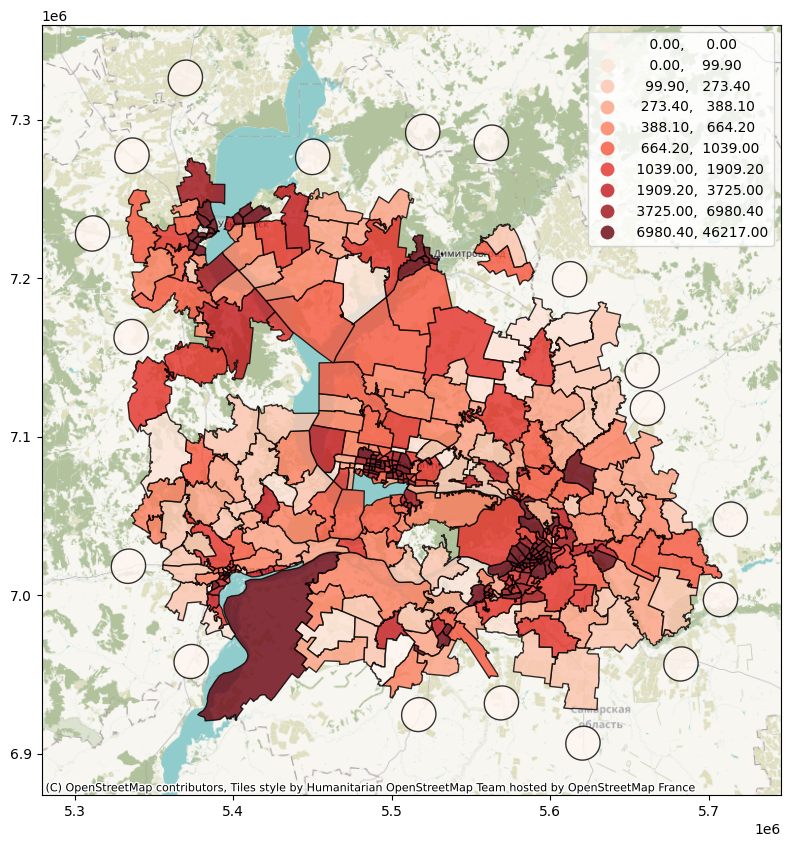

In [174]:
ax = districts_df.plot(figsize=(10, 10), alpha=0.8, edgecolor="k", column="simetra_workers_count", 
                       scheme='user_defined',      # пользовательские интервалы
                       classification_kwds={'bins': bins},
                       cmap='Reds', legend=True)
cx.add_basemap(ax)

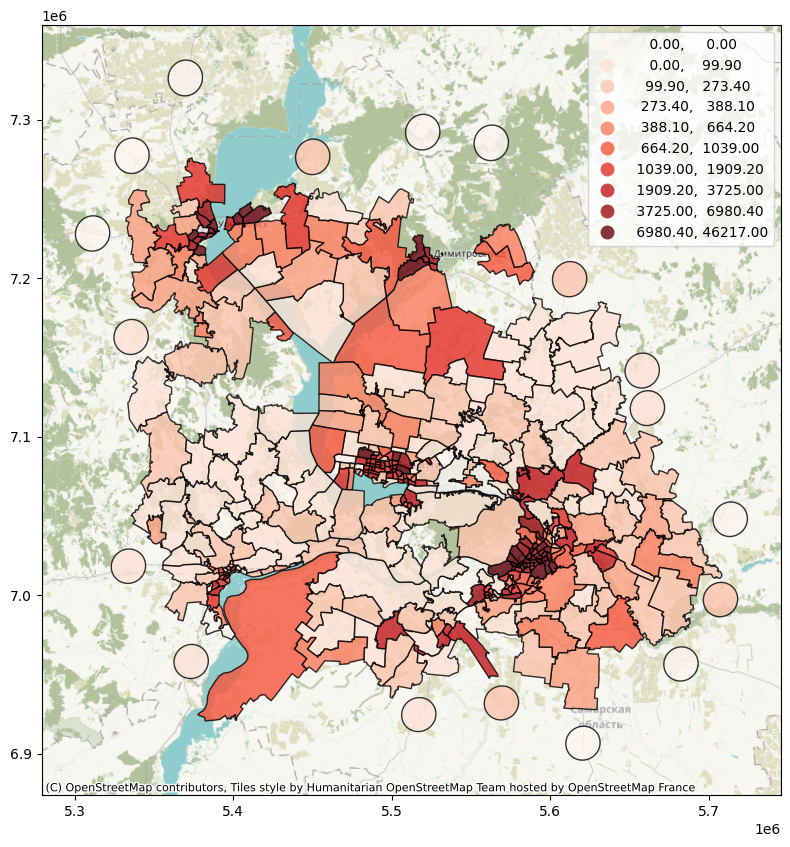

In [175]:
ax = districts_df.plot(figsize=(10, 10), alpha=0.8, edgecolor="k", column="combined_workers_count", 
                       scheme='user_defined',      # пользовательские интервалы
                       classification_kwds={'bins': bins},
                       cmap='Reds', legend=True)
cx.add_basemap(ax)

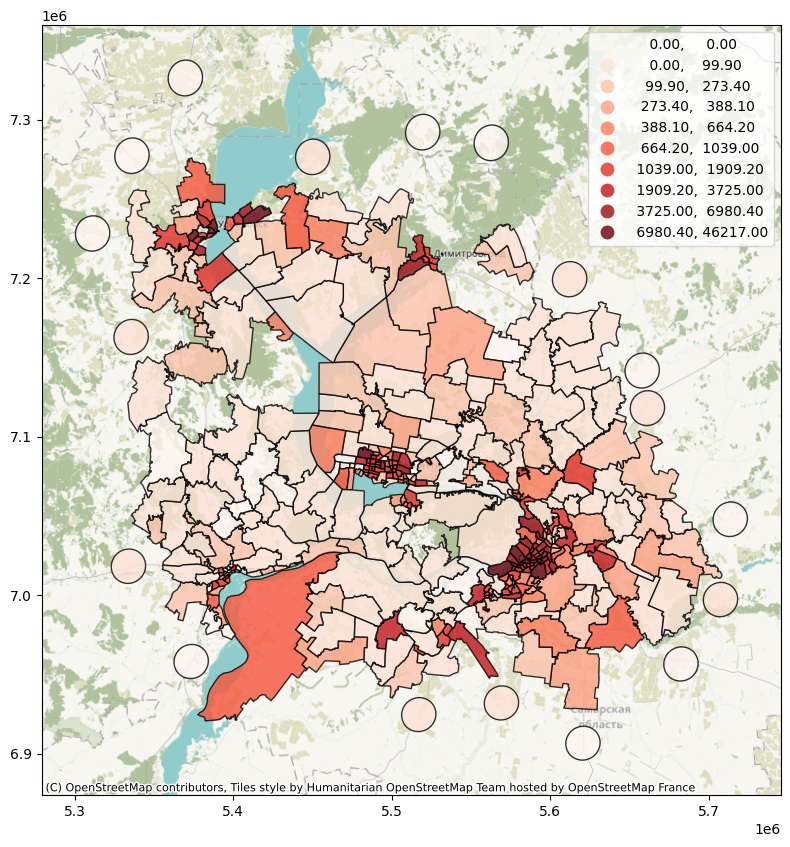

In [177]:
ax = districts_df.plot(figsize=(10, 10), alpha=0.8, edgecolor="k", column="workers_count", 
                       scheme='user_defined',      # пользовательские интервалы
                       classification_kwds={'bins': bins},
                       cmap='Reds', legend=True)
cx.add_basemap(ax)

In [178]:
## корреляция

In [179]:
districts_df.simetra_workers_count.corr(districts_df.workers_count)

np.float64(0.8630482641683361)

In [180]:
districts_df.simetra_workers_count.corr(districts_df.combined_workers_count)

np.float64(0.9143408847912632)

In [181]:
## среднеквадратичное отклонение

In [182]:
import numpy as np

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

In [183]:
rmse(districts_df.simetra_workers_count, districts_df.workers_count)

np.float64(5817.031153622185)

In [184]:
rmse(districts_df.simetra_workers_count, districts_df.combined_workers_count)

np.float64(4431.132905417053)

In [185]:
## среднее относительное отклонение

In [186]:
districts_df['base_mre'] = (np.abs(districts_df.simetra_workers_count - districts_df.workers_count)/districts_df.simetra_workers_count)
districts_df['combined_mre'] = (np.abs(districts_df.simetra_workers_count - districts_df.combined_workers_count)/districts_df.simetra_workers_count)
districts_df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [187]:
districts_df['base_mre'].describe()

count    378.000000
mean       0.780805
std        0.284093
min        0.010117
25%        0.671068
50%        0.816946
75%        0.918315
max        3.455882
Name: base_mre, dtype: float64

In [188]:
districts_df['combined_mre'].describe()

count    378.000000
mean       0.662141
std        0.376398
min        0.003138
25%        0.482127
50%        0.657669
75%        0.815472
max        3.820617
Name: combined_mre, dtype: float64

In [189]:
import matplotlib.pyplot as plt

def plot_arr(arr, ax=None):
    ys = arr
    xs = [x for x in range(len(ys))]

    if ax:
        ax = plt.plot(xs, ys)
        return
    plt.plot(xs, ys)
    plt.show()
    # Make sure to close the plt object once done
    plt.close()

In [190]:
districts_df.to_csv('astrakhan_res.csv')

In [191]:
districts_df['base_mre'].median()

np.float64(0.8169458892765633)

In [192]:
districts_df['combined_mre'].median()

np.float64(0.657668662036008)

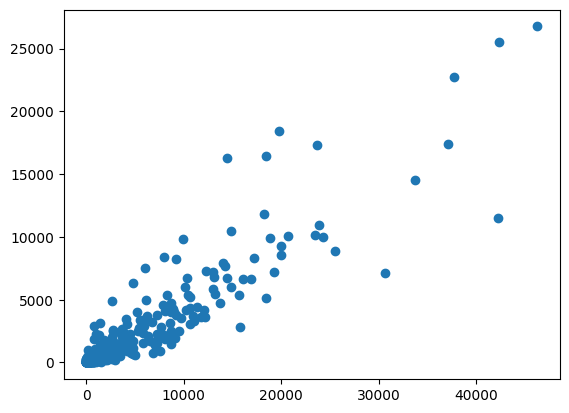

In [193]:
import matplotlib.pyplot as plt
plt.scatter(districts_df['simetra_workers_count'], districts_df['combined_workers_count'])

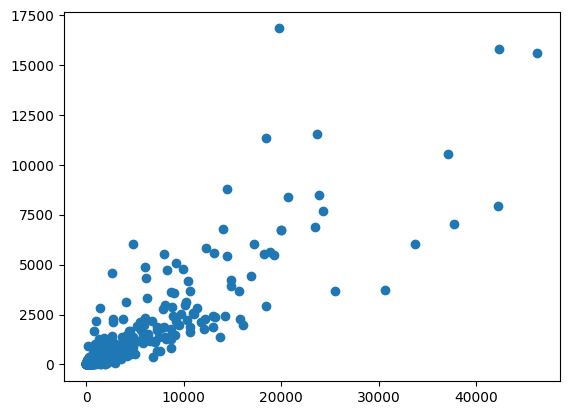

In [195]:
plt.scatter(districts_df['simetra_workers_count'], districts_df['workers_count'])

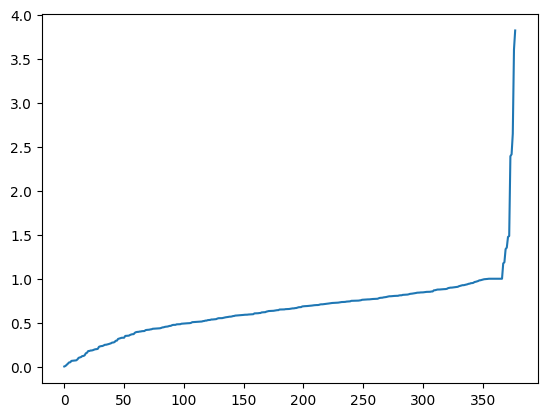

In [196]:
plot_arr(districts_df.sort_values('combined_mre')['combined_mre'])

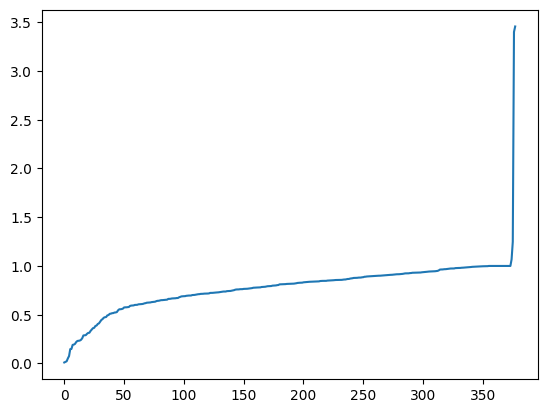

In [198]:
plot_arr(districts_df.sort_values('base_mre')['base_mre'])

In [199]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

In [200]:
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

In [203]:
len(districts_df)

398

In [209]:
districts_df.sort_values('base_mre')['base_mre']

NO
10101.0    0.010117
20108.0    0.016234
20902.0    0.022472
21026.0    0.051613
10812.0    0.075855
             ...   
99914.0         NaN
99915.0         NaN
99916.0         NaN
99917.0         NaN
99918.0         NaN
Name: base_mre, Length: 398, dtype: float64

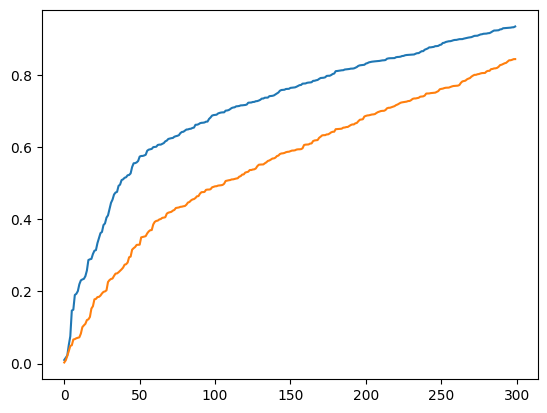

In [210]:
plot_arr(list(districts_df.sort_values('base_mre')['base_mre'])[:q75], ax1)
plot_arr(list(districts_df.sort_values('combined_mre')['combined_mre'])[:q75], ax2)

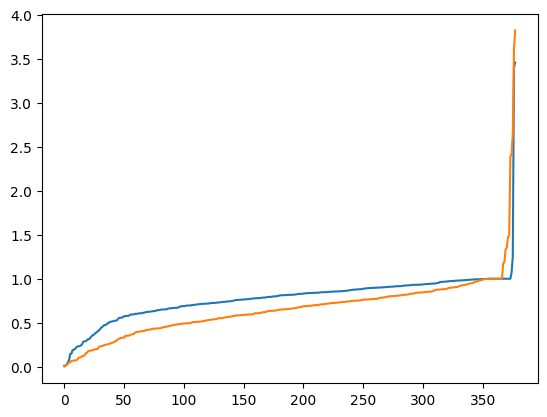

In [211]:
plot_arr(districts_df.sort_values('base_mre')['base_mre'], ax1)
plot_arr(districts_df.sort_values('combined_mre')['combined_mre'], ax2)

In [212]:
len(districts_df)

398

In [213]:
districts_df.base_mre.describe()

count    378.000000
mean       0.780805
std        0.284093
min        0.010117
25%        0.671068
50%        0.816946
75%        0.918315
max        3.455882
Name: base_mre, dtype: float64

In [214]:
districts_df.combined_mre.describe()

count    378.000000
mean       0.662141
std        0.376398
min        0.003138
25%        0.482127
50%        0.657669
75%        0.815472
max        3.820617
Name: combined_mre, dtype: float64

In [218]:
districts_df.index()

TypeError: 'Index' object is not callable

In [230]:
from sklearn.metrics import r2_score

only_good = districts_df

r2_base = r2_score(only_good['simetra_workers_count'], only_good['workers_count'])
r2_combined = r2_score(only_good['simetra_workers_count'], only_good['combined_workers_count'])

In [221]:
r2_score(districts_df['simetra_workers_count'], districts_df['workers_count']), r2_score(districts_df['simetra_workers_count'], districts_df['combined_workers_count'])


(0.2852112628372624, 0.5852327340790502)

In [231]:
r2_base, r2_combined

(0.2852112628372624, 0.5852327340790502)

In [222]:
only_good.simetra_workers_count.corr(only_good.workers_count)

np.float64(0.8610939118511821)

In [223]:
only_good.simetra_workers_count.corr(only_good.combined_workers_count)

np.float64(0.9136039137845623)

In [228]:
rmse(districts_df.simetra_workers_count, districts_df.workers_count)

np.float64(5817.031153622185)

In [229]:
rmse(districts_df.simetra_workers_count, districts_df.combined_workers_count)

np.float64(4431.132905417053)